In [2]:
from rdkit import Chem
import matplotlib.pyplot as plt
from rdkit.Chem import Draw
from PIL import Image
import io

Chemistry revolves around molecules. When working in the laboratory, as chemists, it is of utmost importance to know with what molecules we are working with. 1H NMR may be one of the most if not the most important method to know what the product synthetised may be. It allowed through the years to refine the knowledge of chemistry as it is today and will surely be used for years to come. 

1H NMR is based upon different kinds of interaction within a molecule: J coupling, chemical shift coupling, dipole coupling, interactions of the molecule with the solvent and so on.

A proper model of 1H NMR would require quantum calculations and be heavy in electrical brain power. A simplification of this model was brought by a team of researchers : H.M. Bell, L.K. Berry, E.A. Madigan in the paper Org. Magn. Res. ~. 693 (1984). This simplification was that for different kinds of hydrogens, the chemical shift of a carbon can be approximated by what his environnment is and what substituents are on the carbon the hydrogen is bonded to. Along with this knowledge, an easier version of a 1H NMR predictor is possible and it is what was tried in this project. 



The approximations done to the system are: 
1. All hydrogens that are on the same atom have the same shift.
2. The peaks are perfect gaussians.
3. The split between peaks of the same hydrogen is a constant and is the same for every hydrogen.
4. The ratio of height between the peaks of one hydrogen are determined by an approximate table made looking at 1H NMR of molecules and is the same for every hydrogen.
5. Only the functional groups that are in a radius of four around an alkyl hydrogen are considered.
6. The shift coupling interactions decrease with a ratio of one over the number of bonds in between squared.
7. No interactions with the solvent were considered.

The function that is most important is NMR(name : str). This function directly or indirectly holds every other function and shows the approximate NMR calculated with the tables of experimental chemical shift. This function works for every coumpounds containing alkyl, aromatic, -O, -N and/or -S hydrogens as long as the functional groups of the chemical are in the table. This function can take as the input either the IUPAC name or the SMILES representation of the compound. 

The multiplicity was calculated independently from the rest and was given for every atom in the molecule which had one hydrogen or more. A dictionnary representing the number of hydrogens on each atom was used intermediatly to have this result. 

For hydrogens on alkyls, the program works with Mol objects and creates a molecular map. This map is a dictionnary with the keys being the index of the atom and the values the distance from a chosen starting atom. The program takes all the branches of the molecule from the starting atom; branches are the substituants of the starting atom until the end of the molecule. These branches are then individually analysed and the functional groups are recognized with the rdkit function GetSubstructMatches(). From all these results, the shift could be calculated using the tables of shift. 



# For hydrogens on aromatic carbons, the shifts were all calculated at the same time using smiles representations to search for the functional groups. 



A problem arose with alkyls, more precisely with secondary carbons in the case of molecules with an aromatic ring and two branches or more on this ring with subbranches on it. The branches given by the algorithm developped were in smiles notation. Most of the time, the smiles given started with the atom chosen and that was what was meant to be, but sometimes unexpectedly it was not the case. This means that it was difficult to know precisely where in the molecule the branch was and the distances were not measured correctly. This resulted in an index out of range error in the search_algo function which unfortunately couldn't be fixed. This error could maybe be debugged doing a maximum similarity method on the molecule with the branch aquired and determine which atom in the branch dimension corresponds to the root atom in the molecule dimension. Alternatively molecular maps could be done for each atom on the branch and the map which corresponds best to the one from the starting atom is defined as the root atom. Both of these methods were tried but were too difficult to code and so this was let in place.


# Limitations of aromatics



The results for most molecules though are pretty convincing:

# Import the functions and replace the images by functions.

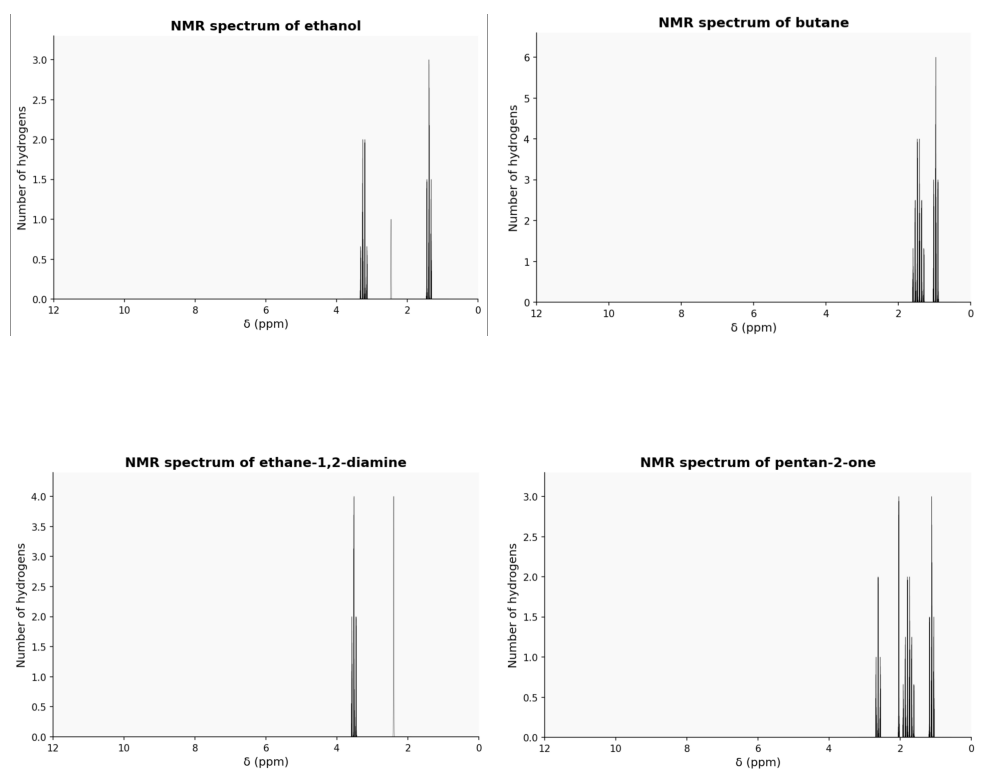

In [36]:
# Display an image from a local file
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load images
NMR_ethanol = mpimg.imread('BA4/Practical_programming_in_chemistry/NMR_ethanol.png') #NMR('ethanol')
NMR_butane = mpimg.imread('BA4/Practical_programming_in_chemistry/NMR_butane.png') #NMR('CCCC(=O)O')
NMR_ethylene_diamine = mpimg.imread('BA4/Practical_programming_in_chemistry/NMR_ethylene_diamine.png') #NMR, Mol = Show('Anilin', 2)
NMR_pentan_2_one= mpimg.imread('BA4/Practical_programming_in_chemistry/NMR_pentan-2-one.png') #Mol

# Create a figure with a grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Display each image in a subplot
axs[0, 0].imshow(NMR_ethanol)
axs[0, 0].axis('off')  # Hide axes

axs[0, 1].imshow(NMR_butane)
axs[0, 1].axis('off')

axs[1, 0].imshow(NMR_ethylene_diamine)
axs[1, 0].axis('off')

axs[1, 1].imshow(NMR_pentan_2_one)
axs[1, 1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

As mentionned before, the program partially works using the rdkit function GetSubstructMatches(), it is really useful as it allows to know if a functional group of the table is in the molecule and indicates precisely where exactly it is. Sadly, it is as useful as it prevents exact calculations within the approximation. Indeed, it was thought during the developpment of the program that aromatic rings would be a problem because of the different kinds of aromatic rings there are in the table. The shift shouldn’t be the same for the two examples below but yet with the approach of GetSubstructMatches() it is. 

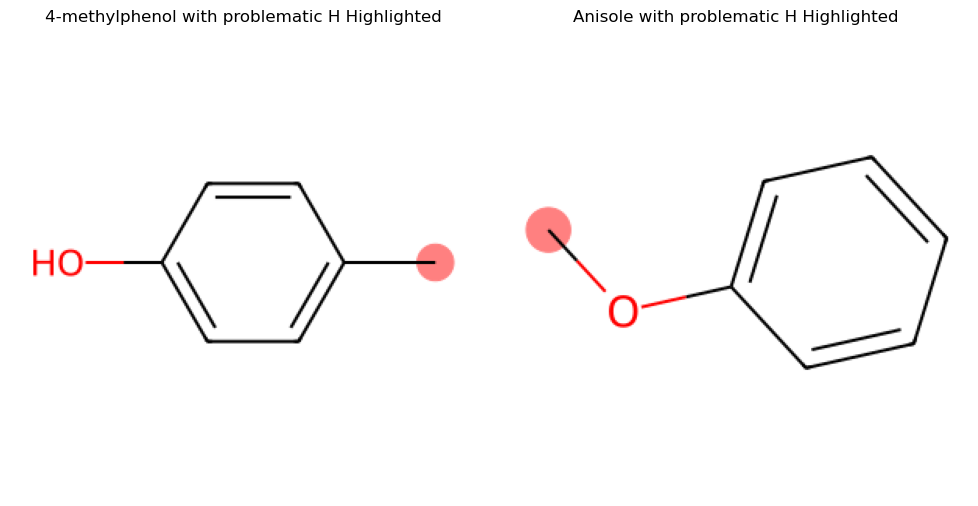

In [4]:
# Create RDKit molecule objects from SMILES strings
smiles1 = 'Cc1ccc(O)cc1' 
smiles2 = 'COc1ccccc1'  
mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)

# Highlight terminal carbon in both molecules
highlight_atoms1 = [0]
highlight_atoms2 = [0]

# Generate images for the molecules with highlighted atoms
drawer1 = Draw.rdMolDraw2D.MolDraw2DCairo(300, 300)
Draw.rdMolDraw2D.PrepareAndDrawMolecule(drawer1, mol1, highlightAtoms=highlight_atoms1)
drawer1.FinishDrawing()
img1 = drawer1.GetDrawingText()

drawer2 = Draw.rdMolDraw2D.MolDraw2DCairo(300, 300)
Draw.rdMolDraw2D.PrepareAndDrawMolecule(drawer2, mol2, highlightAtoms=highlight_atoms2)
drawer2.FinishDrawing()
img2 = drawer2.GetDrawingText()

# Convert the raw image data to PIL images
img1 = Image.open(io.BytesIO(img1))
img2 = Image.open(io.BytesIO(img2))

# Create a figure with a single row of subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Display each image in a subplot
axs[0].imshow(img1)
axs[0].axis('off')  # Hide axes
axs[0].set_title('4-methylphenol with problematic H Highlighted')

axs[1].imshow(img2)
axs[1].axis('off')  # Hide axes
axs[1].set_title('Anisole with problematic H Highlighted')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


That is why the function clean_aromatics was developped. It was made purposefully to cut off every substituants of every aromatic rings to not have this problem anymore. Indeed, in the right hand side molecule, the molecule stays the same, but on the left hand side of the molecule, it simply becomes a toluene. 

The problem of GetSubstructMatches() was then observed for non-aromatic substituents. Indeed, this method doesn’t identify the order of the smiles and so it can’t distinguish between esthers bonded from the carbon or from the oxygen


Another pretty powerful tool made in this project is the Show(name : str, z : int) function which builds on the NMR(name : str) function and highlights in red on the graph the peak belonging to the hydrogen picked and highlights in red on the molecule the atoms with hydrogens that have the same chemical shift.

To have these final functions a lot of intermediate ones were needed. The hardest one was search_algo(index, smiles). That is because of the lack of instructions on as how to do this. Different algorithms were tried but finally thrown away due to a too high complexity. The most promising one was to consider molecules as branches. From a particular atom, different branches can be obtained. The branches from start to end could be compared to the list of substituants. If the branch was not one of the substituants then the furthest atom would be cut off and so on until the branch looked like one of the substituants. Once one was observed, the analysis would start again for the same branch but cutting the group identified before so as to not have doubles. This algorithm would have not had the flaw of the current algorithm but it seemed that it was most complicated to put into operation, especially at intersections or with different lengths subbranches.

This project represents around 100 hours of work combined between the two authors. This time was invested thinking about proper algorithms on paper, coding and debugging. 